In [6]:
import orbit 
from orbit.models import DLT #one of the Orbit models  
from orbit.diagnostics.plot import plot_predicted_data, plot_predicted_components #for plotting predictions

#for data wrangling
import pandas as pd
import pandahouse as ph
import numpy as np
import os

#for plotting
import seaborn as sns
import matplotlib.pyplot as plt
import arviz as az #this is useful for MCMC visualization

/Users/Yanaorfin_1/opt/anaconda3/envs/orbit/lib/python3.10/site-packages/arviz/__init__.py:39: FutureWarning: 
ArviZ is undergoing a major refactor to improve flexibility and extensibility while maintaining a user-friendly interface.
Some upcoming changes may be backward incompatible.
For details and migration guidance, visit: https://python.arviz.org/en/latest/user_guide/migration_guide.html
  warn(


In [15]:
from orbit.diagnostics.plot import (
    plot_predicted_data,
    plot_predicted_components
)

In [7]:
connection = {'host': ' http://clickhouse.lab.karpov.courses:8123',
'database':'simulator_20241020',
'user':'student',
'password':'dpo_python_2020'
}

In [8]:
query = '''
SELECT 
    toStartOfHour(time) hour_time,
    countIf(action = 'like')/countIf(action = 'view') CTR
FROM 
    simulator.feed_actions_all
WHERE hour_time >= toDateTime('2021-11-19 00:00:00')
  AND hour_time <= toDateTime('2021-12-19 00:00:00')
GROUP BY hour_time
ORDER BY 
    hour_time
'''

In [9]:
activity = ph.read_clickhouse(query=query, connection=connection)
activity.head()

,hour_time,CTR
0,2021-11-19 00:00:00,0.220865
1,2021-11-19 01:00:00,0.216720
2,2021-11-19 02:00:00,0.213163
3,2021-11-19 03:00:00,0.211687
4,2021-11-19 04:00:00,0.216482


In [10]:
#seaborn settings
sns.set(rc={'figure.figsize':(16,6)}, style="whitegrid")

Text(0.5, 1.0, 'CTR over time')

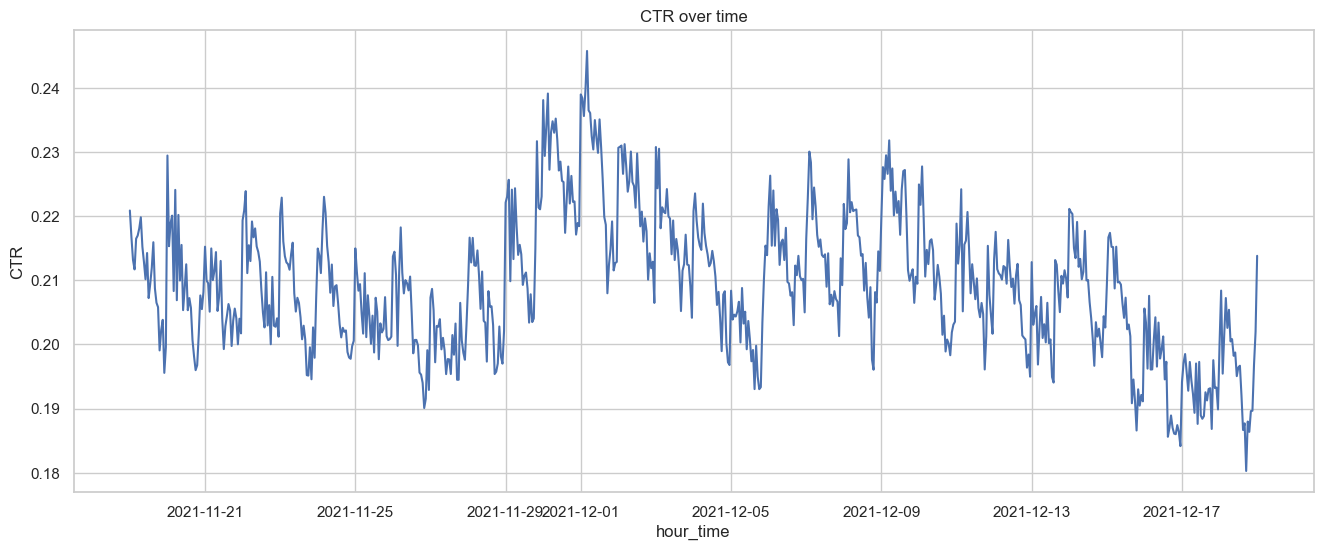

In [11]:
sns.lineplot(data=activity,x='hour_time',y='CTR')
plt.title('CTR over time')

In [12]:
dir(orbit)

['Path',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'about',
 'constants',
 'diagnostics',
 'estimators',
 'exceptions',
 'f',
 'forecaster',
 'here',
 'models',
 'template',
 'utils']

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

df = activity.copy()
df["hour_time"] = pd.to_datetime(df["hour_time"])

df["date"] = df["hour_time"].dt.day
df["hour"] = df["hour_time"].dt.hour

In [23]:
heatmap_data = df.pivot_table(
    index="hour",
    columns="date",
    values="CTR",
    aggfunc="mean"
)

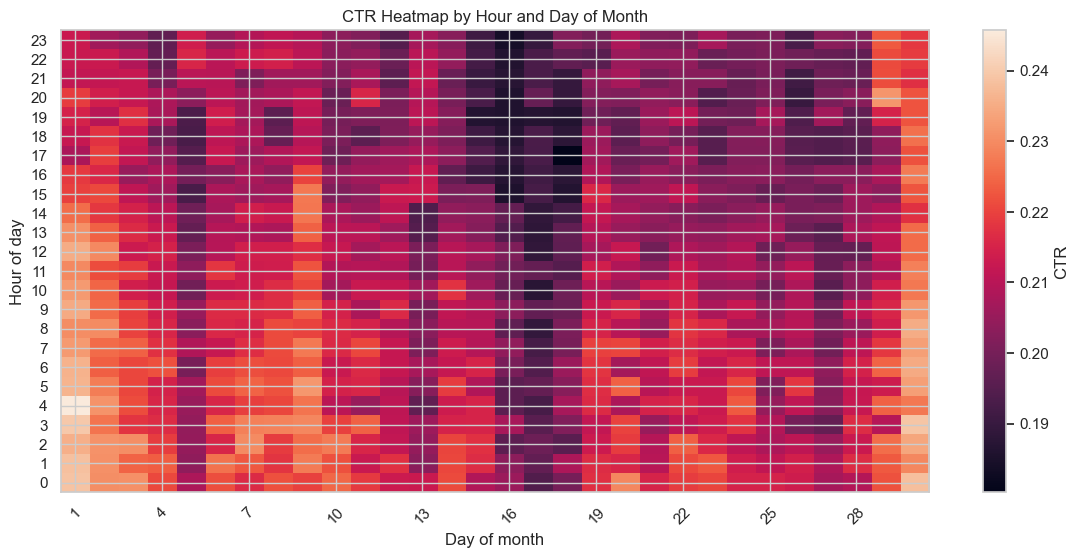

In [28]:
plt.figure(figsize=(14, 6))
plt.imshow(
    heatmap_data,
    aspect="auto",
    origin="lower"
)

plt.colorbar(label="CTR")
plt.xlabel("Day of month")
plt.ylabel("Hour of day")
plt.title("CTR Heatmap by Hour and Day of Month")

plt.xticks(
    ticks=range(0, len(heatmap_data.columns), max(1, len(heatmap_data.columns)//10)),
    labels=heatmap_data.columns[::max(1, len(heatmap_data.columns)//10)],
    rotation=45
)

plt.yticks(range(24))
plt.show()

In [30]:
heatmap_norm = (
    heatmap_data - heatmap_data.mean()
) / heatmap_data.std()

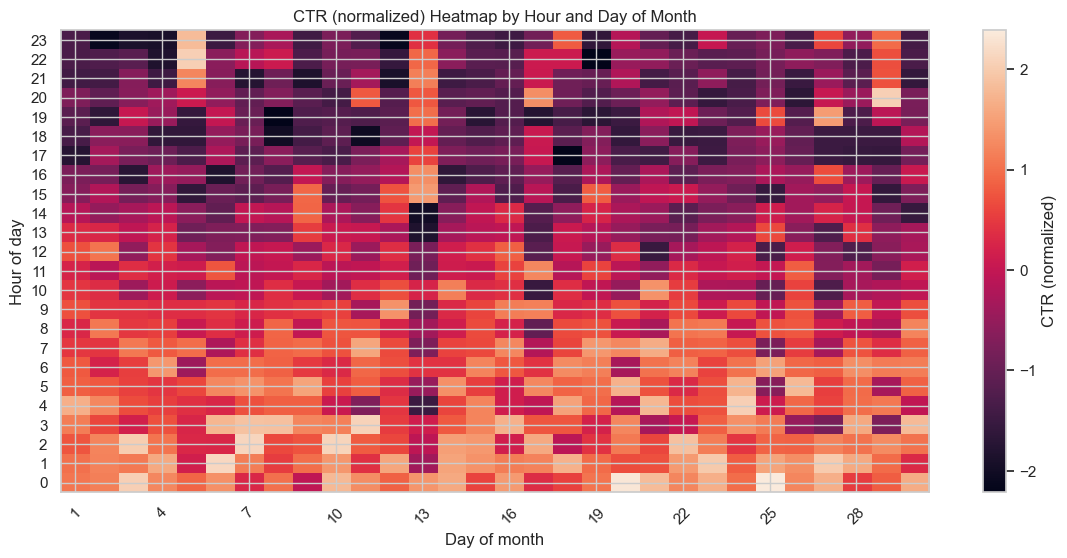

In [31]:
plt.figure(figsize=(14, 6))
plt.imshow(
    heatmap_norm,
    aspect="auto",
    origin="lower"
)

plt.colorbar(label="CTR (normalized)")
plt.xlabel("Day of month")
plt.ylabel("Hour of day")
plt.title("CTR (normalized) Heatmap by Hour and Day of Month")

plt.xticks(
    ticks=range(0, len(heatmap_norm.columns), max(1, len(heatmap_norm.columns)//10)),
    labels=heatmap_norm.columns[::max(1, len(heatmap_norm.columns)//10)],
    rotation=45
)

plt.yticks(range(24))
plt.show()